##**Polynomial regression**

**Features --> polynomial transformation --> Linear regression --> Label** 

For polynomial as we know we also require **`LinReg`** class

In [2]:
#@title imported libraries
from IPython.display import display,Math,Latex  #for proper rendering of latex in colab
import numpy as np

# for generating plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#@title LinReg class
class LinReg(object):
    '''            I
        Linear regression model
        y=xew
        X:Afeature matrix
        w:weight vector
        y:label vector
    '''
    def __init__(self):
      self.t0=200
      self.t1=100000
    def predict(self,X:np.ndarray)->np.ndarray:
      '''Prediction of output label foragiven input.
      Args:
        X:Feature matrix for given inputs.
      Returns:
        y:Output label vector as predicted by the given model.
      '''  
      y=X@self.w
      return y
    def loss(self,X:np.ndarray,y:np.ndarray)->float:
      ''' Calculates loss foramodel based on known labels.
          Args:
            X:Feature matrix for given inputs.
            y:Output label vector as predicted by the given model.
          Returns:
            Loss
      '''
      e=y-self.predict(X)
      return (1/2)*(np.transpose(e)@e)
    def rmse(self,X:np.ndarray,y:np.ndarray)->float:
      ''' Calculates root mean squared error of prediction w.r.t. actual label.
          Args:
          X:Feature matrix for given inputs.
          y:Output label vector as predicted by the given model.
          Returns:
          Loss
      ''' 
      return np.sqrt((2/X.shape[0])*self.loss(X,y))
    def fit(self,X:np.ndarray,y:np.ndarray)->np.ndarray:
      ''' Estimates parameters of the linear regression model with normal equation.
            Args:
            X:Feature matrix for given inputs.
            y:Output label vector as predicted by the given model.
                  I
            Returns:
            Weight vector
      '''
      self.w=np.linalg.pinv(X)@y
      return self.w
    def calculate_gradient(self,X:np.ndarray,y:np.ndarray)->np.ndarray:
      '''Calculates gradients of loss function w.r.t weight vector on training set.
          Arguments:
              X:Feature matrix for training data.
              y:Label vector for training data.
          Returns:
              A vector of gradients.
      '''
      return np.transpose(X)@(self.predict(X)-y)
    def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
      '''Updates the weights based on the gradient of loss function.
        Weight updates are carried out with the following formula:
            w_new:=w_old-ir*grad
        Args:
          2. grad:gradient of loss w.r.t.w
          3. lr:learning rate
        Returns:
          Updated weight vector
      '''
      return(self.w-lr*grad)

    def learning_schedule(self,t):
      return self.t0/(t+self.tl)
    def gd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,lr:float)->np.ndarray:
      '''Estimates parameters of linear regression model through gradient descent.
          Args:
                X:Feature matrix for training data.
                y:Label vector for training data.
                num_epochs:Number of training steps
                1r:Learning rate
          Returns:
              Weight vector:Final weight vector
      '''
      self.w=np.zeros((X.shape[1]))
      self.w_all=[]
      self.err_all=[]
      for i in np.arange(0,num_epochs):
        dJdw=self.calculate_gradient(X,y)
        self.w_all.append(self.w)
        self.err_all.append(self.loss(X,y))
        self.w=self.update_weights(dJdw,lr)
      return self.w


    def mbgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,batch_size:int)->np.ndarray:
      ''' Estimates parameters of linear regression model through gradient descent.
          Args:
            X:Feature matrix for training data.
              y:Label vector for training data.
              num_epochs:Number of training steps
              batch_size:Number of examples inabatch
          Returns:
            Weight vector:Final weight vector
      '''
      self.w=np.zeros((X.shape[1]))
      self.w_all=[]
      self.err_all=[]
      mini_batch_id=0

      for epoch in range(num_epochs):
        shuffled_indices=np.random.permutation(X.shape[0])
        X_shuffled=X[shuffled_indices]
        y_shuffled=y[shuffled_indices]
        for i in range(0,X.shape[0],batch_size):
          mini_batch_id+=1
          xi=X_shuffled[i:i+batch_size]
          yi=y_shuffled[i:i+batch_size]

          self.w_all.append(self.w)
          self.err_all.append(self.loss(xi,yi))

          dJdw=2/batch_size*self.calculate_gradient(xi,yi)
          self.w=self.update_weights(dJdw,self.learning_schedule(mini_batch_id))
      return self.w

    def sgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int)->np.ndarray:
      '''Estimates parameters of linear regression model through gradient descent.
          Args:
            X:Feature matrix for training data.
            y:Label vector for training data.
              num_epochs:Number of training steps
            batch_size:Number of examples inabatch
          Returns:
            Weight vector:Final weight vector
      '''
      #Parameter vector initialized to[0,0]
      self.w=np.zeros((X.shape[1]))
      self.w_all=[]
      self.err_all=[]
      for epoch in range(num_epochs):
        for i in range(X.shape[0]):
          random_index=np.random.randint(X.shape[0])
          xi=X[random_index:random_index+1]
          yi=y[random_index:random_index+1]
          
          self.w_all.append(self.w)
          self.err_all.append(self.loss(xi,yi))
        
          gradients=2*self.calculate_gradient(xi,yi)
          lr=self.learning_schedule(epoch*X.shape[0]+i)
          
          self.w=self.update_weights(gradients,lr)
      return self.w   

Steps for generating polynomial transformation of degree M
* Generate combiantion of input features of lenghts =0,1...M
* Perform multiplication operation between features to obtain the new features

**For example**
  For single feature $x_1$,$\phi_m$= [1,$x_1^1$,$x_1^2$,.....,$x_1^m$]
  * Generate combinations of {1,$x_1$,($x_1$,$x_1$),($x_1$,$x_1$,$x_1$)........,($x_1$,$x_1$,...m times)}

    * 0th degree:1
    * 1-st degree:$x_1$
    * 2nd degree:($x_1$,$x_1$)<br>
    .<br>
    * m-th degree: ($x_1$,$x_1$,...m times)

  * taking the product of elements in combination
      $\phi_m(x_1)$={1,$x_1$,($x_1$`*`$x_1$),($x_1$`*`$x_1$`*`$x_1$)....}

* (Second Order) For two features say($x_1$,$x_2$) obtain $\phi_2$($x_1$,$x_2$):
  * Generate cobinations of{$1,x_1,x_2,(x_1,x_1),(x_2,x_2),(x_1,x_2)$}

    * 0th degree:1
    * 1st degree: $x_1,x_2$
    * 2nd degree: $(x_1,x_1),(x_2,x_2),(x_1,x_2)$
  * Taking the product of elements in combination:<br>
    $\phi_2$={1,$x_1$,$x_2$,($x_1$`*`$x_1$),($x_2$`*`$x_2$),($x_1$`*`$x_2$)}<br>
    ={1,$x_1,x_2,x_1^2,x_2^2,x_1x_2$}

* (Third Order) Similarly we can generate For two features say($x_1$,$x_2$) obtain $\phi_3$($x_1$,$x_2$):

In [4]:
import itertools
import functools

def get_combinations(x,degree):
  return itertools.combinations_with_replacement(x,degree)

def compute_new_feature(items):
  #reduce (lambda x,y:x*y, {1,2,3,4,5} calculates ((((1*2)*3)*4)*5)

  return functools.reduce(lambda x,y:x*y,items)

In [5]:
for items in get_combinations(np.array([[2,3],[4,5]]),2):
  print(items)
  print(compute_new_feature(items))
# for items in get_combinations([1,2],3):
#   print({items:compute_new_feature(items)})

(array([2, 3]), array([2, 3]))
[4 9]
(array([2, 3]), array([4, 5]))
[ 8 15]
(array([4, 5]), array([4, 5]))
[16 25]


In [72]:
# count=0
{items:compute_new_feature(items) for items in get_combinations([1,2],2)}
# for items in get_combinations([1,2,3,4,5],4):
#   count=count+1
#   print({items:compute_new_feature(items)},count)

{(1, 1): 1, (1, 2): 2, (2, 2): 4}

In [7]:
x=np.array([[2,3],[4,5]])
print(x.T)
features=[np.ones(len(x))]
print(features)

[[2 4]
 [3 5]]
[array([1., 1.])]


In [61]:
import numpy as np
import itertools
import functools

def polynomial_transform(x,degree,logging=False):

  #converts to feature matrix
  if x.ndim==1:
    x=x[:,None]  #creates [1,2,3] to [[1],[2],[3]]
  
  x_t=x.T
  features=[np.ones(len(x))]

  if logging:
    print("Input",x)
  for p in range(1,degree+1):
    for items in get_combinations(x_t,p): #generate combinations
      features.append(compute_new_feature(items)) #combine features into a feature
      if logging:
        print(items,":",compute_new_feature(items))

  if logging:
    print(np.asarray(features).T)
  return np.asarray(features).T      

In [75]:
polynomial_transform(np.array([[1],[5],[2]]),2,True)

Input [[1]
 [5]
 [2]]
(array([1, 5, 2]),) : [1 5 2]
(array([1, 5, 2]), array([1, 5, 2])) : [ 1 25  4]
[[ 1.  1.  1.]
 [ 1.  5. 25.]
 [ 1.  2.  4.]]


array([[ 1.,  1.,  1.],
       [ 1.,  5., 25.],
       [ 1.,  2.,  4.]])

In [10]:
polynomial_transform(np.array([[2,3],[4,5]]),degree=2,logging=True)

Input [[2 3]
 [4 5]]
(array([2, 4]),) : [2 4]
(array([3, 5]),) : [3 5]
(array([2, 4]), array([2, 4])) : [ 4 16]
(array([2, 4]), array([3, 5])) : [ 6 20]
(array([3, 5]), array([3, 5])) : [ 9 25]
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [11]:
polynomial_transform(np.array([[2,3],[4,5]]),degree=3,logging=True)

Input [[2 3]
 [4 5]]
(array([2, 4]),) : [2 4]
(array([3, 5]),) : [3 5]
(array([2, 4]), array([2, 4])) : [ 4 16]
(array([2, 4]), array([3, 5])) : [ 6 20]
(array([3, 5]), array([3, 5])) : [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4])) : [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5])) : [12 80]
(array([2, 4]), array([3, 5]), array([3, 5])) : [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5])) : [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

##**Non-linear training data generation**

We generate training data with a single feature $x_1$ label $y=\sin(2\pi x_1)+noise$

In [12]:
#creates a training set where the output label is obtained by first
#calculating sin(2*pi*x) and then adding random noise having
# a gaussian distribuation (0......1) divides according sample size 
# for example for sample_size=4 here is distribution
# array([0.        , 0.33333333, 0.66666667, 1.        ])

def create_nonlin_training_set(func,sample_size,std):
  x=np.linspace(0,1,sample_size)
  y=func(x)+np.random.normal(scale=std,size=x.shape)
  return x,y

def nonlin(x):
  return np.sin(2*np.pi*x)


##**Viusalization of training data and model fitment**

In [13]:
def visualize_training_data(X_train,y_train):
  points=np.linspace(0,1,100)
  output=nonlin(points)

  plt.scatter(X_train,y_train,facecolor="none",edgecolor='blue',s=50,label="training data")
  plt.plot(points,output,c="g",label="$\sin(2\pi x)$")
  plt.xlabel('$x_1$')
  plt.ylabel('y')
  plt.legend()
  plt.show()

def visualize_model_fit(X,y,lin_reg,degree):
  '''Plots trained model along with data generation function'''
  points=np.linspace(0,1,100)
  output=nonlin(points)

  if(degree>0):
    plt.scatter(X,y,facecolor="none",edgecolor='b',s=50,label="training data")
  plt.plot(points,output,c="g",label="$\sin(2\pi x)$")

  y_hat=lin_reg.predict(polynomial_transform(points,degree))
  plt.plot(points,y_hat,c="r",label="$h_\mathbf{w}(x)$")
  plt.xlabel('$x_1$')
  plt.ylabel('y')
  plt.ylim(-1.5,1.5)
  plt.title("M={}".format(degree)) #xy=(-0.15,1)
  plt.show()

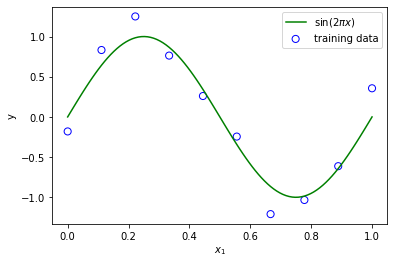

In [14]:
num_samples=10
X,y=create_nonlin_training_set(nonlin,num_samples,0.2)
visualize_training_data(X,y)

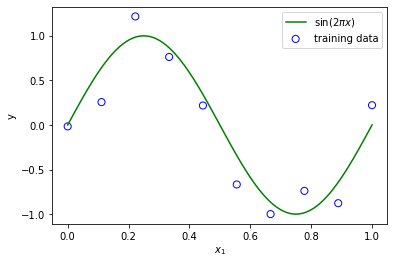

In [15]:
num_samples=10
X,y=create_nonlin_training_set(nonlin,num_samples,0.2)
visualize_training_data(X,y)

##**Polynomial Model**

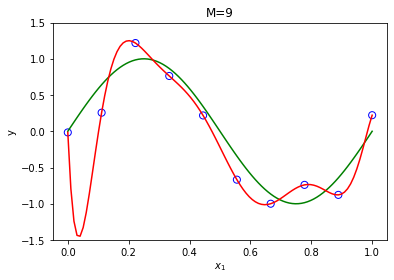

In [16]:
degree=9
X_transform=polynomial_transform(X,degree)
lin_reg=LinReg()
lin_reg.fit(X_transform,y)
visualize_model_fit(X,y,lin_reg,degree)

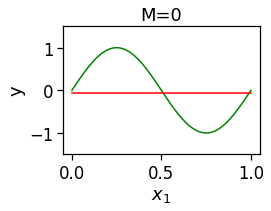

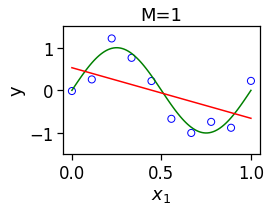

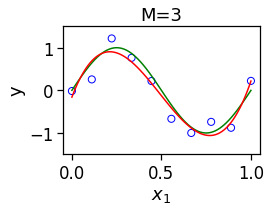

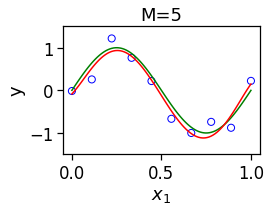

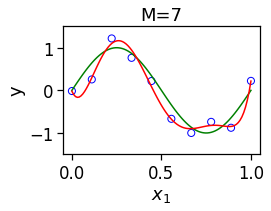

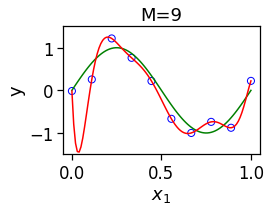

<Figure size 864x576 with 0 Axes>

In [17]:
f=plt.figure(figsize=(12,8))
sns.set_context("notebook",font_scale=1.5,rc={"line.linewidth":2.5})

for i,degree in enumerate([0, 1, 3, 5, 7, 9]):
  plt.subplot(3,3,i+1)
  X_transform=polynomial_transform(X,degree)
  lin_reg=LinReg()
  lin_reg.fit(X_transform,y)
  visualize_model_fit(X,y,lin_reg,degree)
  f=plt.figure(figsize=(12,8))
# plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)

f.tight_layout()
plt.show()




##**Model Selection**

* One polynomial model per degree.Which one to select?
* Process
    * Fix the list of degrees that you want to experiment with.
    * Divide the training data into training,validation and test.
    * For each degree m:

        * Training polynomial regression model with training data.
        * Calculate training and validation errors on the trained data.

* Select the model with the lowest training and validation loss among all models. 

In [18]:
import pandas as pd

# def convert_dict_to_df(w_dict,degree):
#   poly_w_dict={i:(np.zeros(degree)) for i in range degree}

def plot_model_selection(training_errors,val_errors):
  plt.plot(training_errors,'o-',mfc="none",mec="b",ms=10)
  plt.plot(val_errors,'o-',mfc="none",mec="r",ms=10,c="r")
  plt.legend()
  plt.xlabel("degree")
  plt.ylabel("RMSE")
  plt.show()  


No handles with labels found to put in legend.


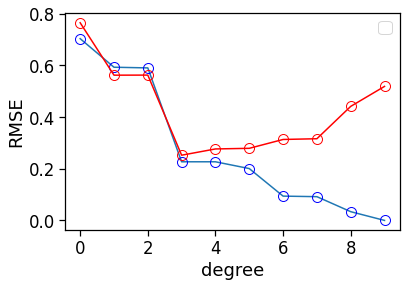

In [19]:
training_errors=[]
val_errors=[]
w_dict={}

X_val=np.linspace(0,1,100)
y_val=nonlin(X_val)

for i in range(10):
  X_transform=polynomial_transform(X,i)
  X_val_transform=polynomial_transform(X_val,i)
  lin_reg=LinReg()
  lin_reg.fit(X_transform,y)

  w_dict[i]=lin_reg.w
  training_errors.append(lin_reg.rmse(X_transform,y))
  val_errors.append(lin_reg.rmse(X_val_transform,
                                y_val+np.random.normal(
                                    scale=0.25,size=len(y_val))))
plot_model_selection(training_errors,val_errors)
  

**Observations**:
1. Higher order polynomial terms are assigned larger weights.The larger weights are problematic as a small change in the input causes a large change in the output
 this problem is called overfitting and large variance

2. We can fix the overfitting problem with more data or regularizations

##**Ridge and Lasso Regression**

Polynomial regression is able to model non-linear relationship between features and labels.However order polynomial models are prone to overfitting.There are two ways to tackle the problem of overfitiing:

1. Train with more data
2. Penalize the weight vector through regularization

We will do #point2
* Regularization leads to change in Linear Regression loss function,which inturn results in change of gradient calculation.


In [20]:
#@title [Important libraries ]
from IPython.display import display,Math,Latex

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###[Polynomial transformation + no-lineat datageneration]
took it from above

We will implement ridge regression by making the following changes (in `blue` color) to Linear Regression implementation

1. Loss function (`loss`):$J(\mathbf{w})=\frac{1}{2}\left(\mathbf{X}\mathbf{w}- \mathbf{y} \right)^T \left(\mathbf{X}\mathbf{w}- \mathbf{y} \right)+\color{blue}{\frac{\lambda}{2}\mathbf{w}^T\mathbf{w}}$

2. Gradient calculation(`calculate_gradient`): $\frac{\partial J(\mathbf{w})}{\partial{\mathbf{w}}}=\mathbf{X}^T (\mathbf{X} \mathbf{w}-\mathbf{y}) +\color{blue}{\lambda\mathbf{w}}$

3. Normal equation (`fit`):$ \mathbf{w}=\left(\mathbf{X}^T\mathbf{X}+\color{blue}{\lambda\mathbf{I}}\right)^{-1}\mathbf{X}^T\mathbf{y}$

In [21]:
#@title [LinReg class]
class LinReg(object):
    '''            I
        Linear regression model
        y=xew
        X:Afeature matrix
        w:weight vector
        y:label vector
    '''
    def __init__(self):
      self.t0=200
      self.t1=100000
    def predict(self,X:np.ndarray)->np.ndarray:
      '''Prediction of output label foragiven input.
      Args:
        X:Feature matrix for given inputs.
      Returns:
        y:Output label vector as predicted by the given model.
      '''  
      y=X@self.w
      return y
    def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->float:
      ''' Calculates loss foramodel based on known labels.
          Args:
            X:Feature matrix for given inputs.
            y:Output label vector as predicted by the given model.
          Returns:
            Loss
      '''
      e=y-self.predict(X)
      # return (1/2)*(np.transpose(e)@e)
      return (1/2)*(np.transpose(e)@e)+(reg_rate/2)*(np.transpose(self.w)@self.w)
    def rmse(self,X:np.ndarray,y:np.ndarray)->float:
      ''' Calculates root mean squared error of prediction w.r.t. actual label.
          Args:
          X:Feature matrix for given inputs.
          y:Output label vector as predicted by the given model.
          Returns:
          Loss
      ''' 
      return np.sqrt((2/X.shape[0])*self.loss(X,y))
    def fit(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->np.ndarray:
      ''' Estimates parameters of the linear regression model with normal equation.
            Args:
            X:Feature matrix for given inputs.
            y:Output label vector as predicted by the given model.
                  I
            Returns:
            Weight vector
      '''
      # self.w=np.linalg.pinv(X)@y
      # return self.w
      self.w=np.zeros((X.shape[1]))
      eye=np.eye(np.size(X,1))
      self.w=np.linalg.solve(
          reg_rate*eye+X.T@X,
          X.T@y,
      )
      return self.w
    def calculate_gradient(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->np.ndarray:
      '''Calculates gradients of loss function w.r.t weight vector on training set.
          Arguments:
              X:Feature matrix for training data.
              y:Label vector for training data.
          Returns:
              A vector of gradients.
      '''
      return np.transpose(X)@(self.predict(X)-y)+reg_rate*self.w
    def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
      '''Updates the weights based on the gradient of loss function.
        Weight updates are carried out with the following formula:
            w_new:=w_old-ir*grad
        Args:
          2. grad:gradient of loss w.r.t.w
          3. lr:learning rate
        Returns:
          Updated weight vector
      '''
      return(self.w-lr*grad)

    def learning_schedule(self,t):
      return self.t0/(t+self.tl)
    def gd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,lr:float)->np.ndarray:
      '''Estimates parameters of linear regression model through gradient descent.
          Args:
                X:Feature matrix for training data.
                y:Label vector for training data.
                num_epochs:Number of training steps
                1r:Learning rate
          Returns:
              Weight vector:Final weight vector
      '''
      self.w=np.zeros((X.shape[1]))
      self.w_all=[]
      self.err_all=[]
      for i in np.arange(0,num_epochs):
        dJdw=self.calculate_gradient(X,y)
        self.w_all.append(self.w)
        self.err_all.append(self.loss(X,y))
        self.w=self.update_weights(dJdw,lr)
      return self.w


    def mbgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,batch_size:int)->np.ndarray:
      ''' Estimates parameters of linear regression model through gradient descent.
          Args:
            X:Feature matrix for training data.
              y:Label vector for training data.
              num_epochs:Number of training steps
              batch_size:Number of examples inabatch
          Returns:
            Weight vector:Final weight vector
      '''
      self.w=np.zeros((X.shape[1]))
      self.w_all=[]
      self.err_all=[]
      mini_batch_id=0

      for epoch in range(num_epochs):
        shuffled_indices=np.random.permutation(X.shape[0])
        X_shuffled=X[shuffled_indices]
        y_shuffled=y[shuffled_indices]
        for i in range(0,X.shape[0],batch_size):
          mini_batch_id+=1
          xi=X_shuffled[i:i+batch_size]
          yi=y_shuffled[i:i+batch_size]

          self.w_all.append(self.w)
          self.err_all.append(self.loss(xi,yi))

          dJdw=2/batch_size*self.calculate_gradient(xi,yi)
          self.w=self.update_weights(dJdw,self.learning_schedule(mini_batch_id))
      return self.w

    def sgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int)->np.ndarray:
      '''Estimates parameters of linear regression model through gradient descent.
          Args:
            X:Feature matrix for training data.
            y:Label vector for training data.
              num_epochs:Number of training steps
            batch_size:Number of examples inabatch
          Returns:
            Weight vector:Final weight vector
      '''
      #Parameter vector initialized to[0,0]
      self.w=np.zeros((X.shape[1]))
      self.w_all=[]
      self.err_all=[]
      for epoch in range(num_epochs):
        for i in range(X.shape[0]):
          random_index=np.random.randint(X.shape[0])
          xi=X[random_index:random_index+1]
          yi=y[random_index:random_index+1]
          
          self.w_all.append(self.w)
          self.err_all.append(self.loss(xi,yi))
        
          gradients=2*self.calculate_gradient(xi,yi)
          lr=self.learning_schedule(epoch*X.shape[0]+i)
          
          self.w=self.update_weights(gradients,lr)
      return self.w   

##**Ridge Regression for fixing overfitting in polynomial regression**

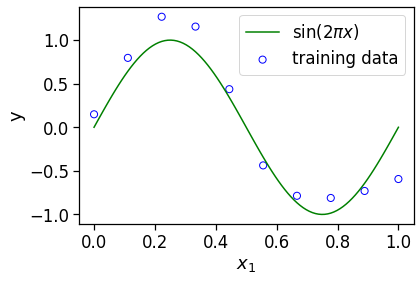

In [22]:
num_samples=10
X,y=create_nonlin_training_set(nonlin,num_samples,0.2)
visualize_training_data(X,y)

In [82]:
from numpy.ma.core import add
def predict(X:np.ndarray,w:np.ndarray)->np.ndarray:
      '''Prediction of output label foragiven input.
      Args:
        X:Feature matrix for given inputs.
      Returns:
        y:Output label vector as predicted by the given model.
      '''  
      y=X@w
      return y
def loss(X:np.ndarray,y:np.ndarray,reg_rate:float,w:np.ndarray)->float:
      ''' Calculates loss foramodel based on known labels.
          Args:
            X:Feature matrix for given inputs.
            y:Output label vector as predicted by the given model.
          Returns:
            Loss
      '''
      X_t=add_dummy_feature(X)
      e=y-predict(X_t,w)
      # return (1/2)*(np.transpose(e)@e)
      return (1/2)*(np.transpose(e)@e)+(reg_rate/2)*(np.transpose(w)@w)
lin_reg=LinReg()
x=np.array([[1,2,3],[3,2,4]])
y=np.array([2,4])
w=np.array([1,0.1,-0.2,0.3])
loss(x,y,0.1,w)

array([9.9105, 9.861 , 9.8355, 9.8605])

#**Ridge regression**

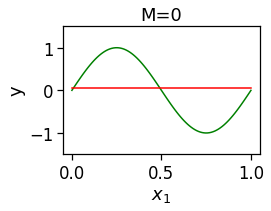

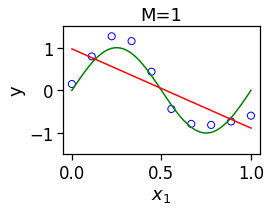

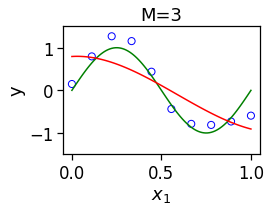

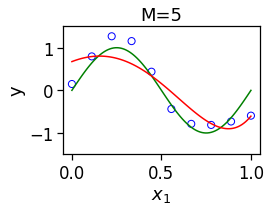

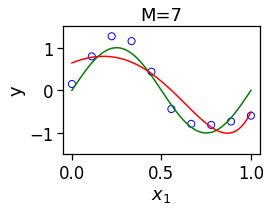

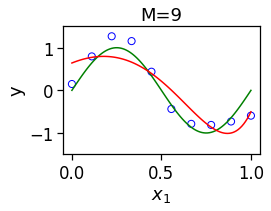

<Figure size 864x576 with 0 Axes>

In [23]:
f=plt.figure(figsize=(12,8))
sns.set_context("notebook",font_scale=1.5,rc={"line.linewidth":2.5})

for i,degree in enumerate([0, 1, 3, 5, 7, 9]):
  plt.subplot(3,3,i+1)
  X_transform=polynomial_transform(X,degree)
  lin_reg=LinReg()
  lin_reg.fit(X_transform,y,reg_rate=0.01)
  visualize_model_fit(X,y,lin_reg,degree)
  f=plt.figure(figsize=(12,8))

# plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
# f.tight_layout()
plt.show()

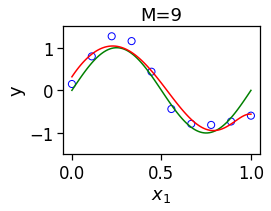

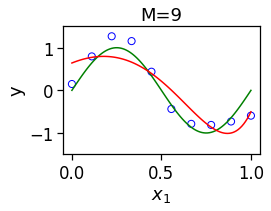

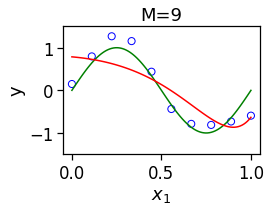

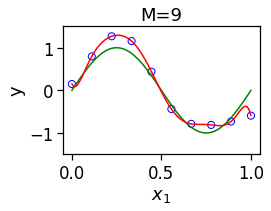

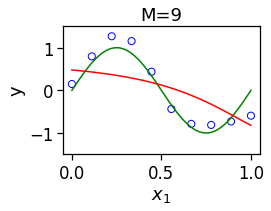

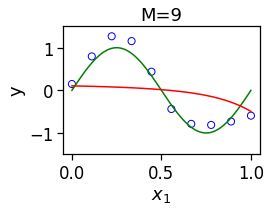

In [24]:
# f=plt.figure(figsize=(12,8))
sns.set_context("notebook",font_scale=1.5,rc={"line.linewidth":2.5})
degree=9
for i,reg_rate in enumerate([1e-3, 1e-2,1e-1,0, 1, 10]):
  f=plt.figure(figsize=(12,8))
  plt.subplot(3,3,i+1)
  X_transform=polynomial_transform(X,degree)
  lin_reg=LinReg()
  lin_reg.fit(X_transform,y,reg_rate)
  visualize_model_fit(X,y,lin_reg,degree)

# plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
# f.tight_layout()
plt.show()

##**Study it from vedios specially ridge**

##**Lasso Regression**

Lasso uses $L_1$ norm of weight vector instead of $L_2$ as used in risge regression

Lasso does not have closed form solution and it's loss function is not differentiable at all points.

In [25]:
from sklearn.linear_model import Lasso
import pandas as pd
#Lasso
reg_Rate=0.01
lasso=Lasso(alpha=reg_rate)
lasso.fit(X_transform,y)

lin_reg=LinReg()
_=lin_reg.fit(X_transform,y,0)


In [26]:
pd.DataFrame({'LinReg':lin_reg.w,'Ridge':'high','Lasso':lasso.coef_})

,LinReg,Ridge,Lasso
0,0.148917,high,0.0
1,-8.461017,high,-0.0
2,337.769280,high,-0.0
3,-3114.488407,high,-0.0
4,15080.579276,high,-0.0
5,-43424.276644,high,-0.0
6,75284.866752,high,-0.0
7,-76588.231609,high,-0.0
8,42017.218182,high,-0.0
9,-9585.718452,high,-0.0


##Observations:
1. Lasso obtains a sparse feature vector.
2. Ridge regression assigns small weights to each feature.

3. Lasso is used for feature selection.

4. When features are important for prediction we use ridge regression

##**Multi-output/Multi-label Regression**
 In case of multi-output regression,there are more than one output labels all of which are real numbers

##Training data
$\mathbf{D}=(\mathbf{X},\mathbf{Y})=(x^{(i)},y^{(i)})$ where i can vary from 0 to n

In [27]:
from sklearn.datasets import make_regression
X,y,coef=make_regression(n_samples=100,n_features=10,n_informative=10,bias=1,n_targets=5,shuffle=True,coef=True,random_state=42)

In [28]:
print(X.shape)
print(y.shape)

(100, 10)
(100, 5)


In [49]:
def add_dummy_feature(x):
  ''' Adds a dummy to the dataset
  Args:
    x:Training dataset
  Returns:
    Training dataset with an addition of dummy feature.
  '''
  return np.column_stack((np.ones(x.shape[0]),x))

In [51]:
def preprocess(X,y):
  from sklearn.model_selection import train_test_split
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  X_train=add_dummy_feature(X_train)
  X_test=add_dummy_feature(X_test)
  return(X_train,X_test,y_train,y_test)

In [52]:
X_train,X_test,y_train,y_test=preprocess(X,y)

##**Model**

The linear regression model is exactly same as a single output except that the output is now a vector:

$\mathbf{Y}=\mathbf{X}_{n*(m+1)}\mathbf{W}_{(m+1)*k}$

There are two approaches to solve this problem:

1. Solve k independent linear regression problems.Gives some flexibility in using different representation for each problem.
2. Solve a join learning problem as outlined in equation above

##Loss
Same as linear regression model but here remember the fact that y is a vector <br>
$J(\mathbf{w})=\frac{1}{2}\left(\mathbf{X}\mathbf{w}- \mathbf{y} \right)^T \left(\mathbf{X}\mathbf{w}- \mathbf{y} \right)$ 

In [57]:
#@title [New LinReg class]
class LinReg(object):
    '''            I
        Linear regression model
        y=xew
        X:Afeature matrix
        w:weight vector
        y:label vector
    '''
    def __init__(self):
      self.t0=200
      self.t1=100000
    def predict(self,X:np.ndarray)->np.ndarray:
      '''Prediction of output label foragiven input.
      Args:
        X:Feature matrix for given inputs.
      Returns:
        y:Output label vector as predicted by the given model.
      '''  
      y=X@self.w
      return y
    def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->float:
      ''' Calculates loss foramodel based on known labels.
          Args:
            X:Feature matrix for given inputs.
            y:Output label vector as predicted by the given model.
          Returns:
            Loss
      '''
      e=y-self.predict(X)
      # return (1/2)*(np.transpose(e)@e)
      return (1/2)*(np.transpose(e)@e)+(reg_rate/2)*(np.transpose(self.w)@self.w)
    def rmse(self,X:np.ndarray,y:np.ndarray)->float:
      ''' Calculates root mean squared error of prediction w.r.t. actual label.
          Args:
          X:Feature matrix for given inputs.
          y:Output label vector as predicted by the given model.
          Returns:
          Loss
      ''' 
      return np.sqrt((2/X.shape[0])*self.loss(X,y))
    def fit(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->np.ndarray:
      ''' Estimates parameters of the linear regression model with normal equation.
            Args:
            X:Feature matrix for given inputs.
            y:Output label vector as predicted by the given model.
                  I
            Returns:
            Weight vector
      '''
      # self.w=np.linalg.pinv(X)@y
      # return self.w
      self.w=np.zeros((X.shape[1],y.shape[1]))
      eye=np.eye(np.size(X,1))
      self.w=np.linalg.solve(
          reg_rate*eye+X.T@X,
          X.T@y,
      )
      return self.w
    def calculate_gradient(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->np.ndarray:
      '''Calculates gradients of loss function w.r.t weight vector on training set.
          Arguments:
              X:Feature matrix for training data.
              y:Label vector for training data.
          Returns:
              A vector of gradients.
      '''
      return np.transpose(X)@(self.predict(X)-y)+reg_rate*self.w
    def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
      '''Updates the weights based on the gradient of loss function.
        Weight updates are carried out with the following formula:
            w_new:=w_old-ir*grad
        Args:
          2. grad:gradient of loss w.r.t.w
          3. lr:learning rate
        Returns:
          Updated weight vector
      '''
      return(self.w-lr*grad)

    def learning_schedule(self,t):
      return self.t0/(t+self.tl)
    def gd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,lr:float,reg_rate:float)->np.ndarray:
      '''Estimates parameters of linear regression model through gradient descent.
          Args:
                X:Feature matrix for training data.
                y:Label vector for training data.
                num_epochs:Number of training steps
                1r:Learning rate
          Returns:
              Weight vector:Final weight vector
      '''
      self.w=np.zeros((X.shape[1],y.shape[1]))
      self.w_all=[]
      self.err_all=[]
      for i in np.arange(0,num_epochs):
        dJdw=self.calculate_gradient(X,y,reg_rate)
        self.w_all.append(self.w)
        self.err_all.append(self.loss(X,y,reg_rate))
        self.w=self.update_weights(dJdw,lr)
      return self.w


    def mbgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,batch_size:int)->np.ndarray:
      ''' Estimates parameters of linear regression model through gradient descent.
          Args:
            X:Feature matrix for training data.
              y:Label vector for training data.
              num_epochs:Number of training steps
              batch_size:Number of examples inabatch
          Returns:
            Weight vector:Final weight vector
      '''
      self.w=np.zeros((X.shape[1]))
      self.w_all=[]
      self.err_all=[]
      mini_batch_id=0

      for epoch in range(num_epochs):
        shuffled_indices=np.random.permutation(X.shape[0])
        X_shuffled=X[shuffled_indices]
        y_shuffled=y[shuffled_indices]
        for i in range(0,X.shape[0],batch_size):
          mini_batch_id+=1
          xi=X_shuffled[i:i+batch_size]
          yi=y_shuffled[i:i+batch_size]

          self.w_all.append(self.w)
          self.err_all.append(self.loss(xi,yi))

          dJdw=2/batch_size*self.calculate_gradient(xi,yi)
          self.w=self.update_weights(dJdw,self.learning_schedule(mini_batch_id))
      return self.w

    def sgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int)->np.ndarray:
      '''Estimates parameters of linear regression model through gradient descent.
          Args:
            X:Feature matrix for training data.
            y:Label vector for training data.
              num_epochs:Number of training steps
            batch_size:Number of examples inabatch
          Returns:
            Weight vector:Final weight vector
      '''
      #Parameter vector initialized to[0,0]
      self.w=np.zeros((X.shape[1]))
      self.w_all=[]
      self.err_all=[]
      for epoch in range(num_epochs):
        for i in range(X.shape[0]):
          random_index=np.random.randint(X.shape[0])
          xi=X[random_index:random_index+1]
          yi=y[random_index:random_index+1]
          
          self.w_all.append(self.w)
          self.err_all.append(self.loss(xi,yi))
        
          gradients=2*self.calculate_gradient(xi,yi)
          lr=self.learning_schedule(epoch*X.shape[0]+i)
          
          self.w=self.update_weights(gradients,lr)
      return self.w   

In [58]:
lin_reg=LinReg()
w=lin_reg.fit(X_train,y_train,reg_rate=0)

#check if the weight vector is same as the coefficient vector used for making the data
np.testing.assert_almost_equal(w[1:,:],coef,decimal=2)

In [59]:
w

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [93.62122462,  5.19712837, 54.12963353, 70.90605195, 87.09691237],
       [89.48166561, 54.75923762, 81.729777  , 45.23182845, 64.35776952],
       [46.26229567, 86.82725054, 72.71690698, 74.27065212, 42.54933344],
       [71.92017783, 22.84547413, 99.63339161, 97.47931621, 65.03256863],
       [19.95424509, 68.02282424,  7.2198409 ,  3.06525022, 25.76828885],
       [52.64026609, 73.15895218,  8.1629982 ,  6.0352084 , 24.7103234 ],
       [15.95446801, 87.17835666, 21.92139874, 97.58652558, 33.68957918],
       [71.40869321, 80.17280831, 33.94501925, 81.48251137,  8.01148464],
       [18.21179157, 78.96985071, 65.87077755, 49.81957165, 55.53635509],
       [16.74825823, 10.45678403, 63.64302495, 70.64757265,  3.15861448]])

In [60]:
w=lin_reg.gd(X_train,y_train,num_epochs=100,lr=0.01,reg_rate=0)
np.testing.assert_almost_equal(w[1:,:],coef,decimal=2)